In [17]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [18]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [19]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

D:\ProgApps\Conda\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
D:\ProgApps\Conda\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
D:\ProgApps\Conda\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\ProgApps\Conda\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [20]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [21]:
X_train = X_train.float()
X_test = X_test.float()

In [22]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [23]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

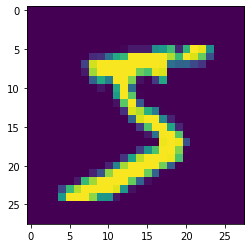

tensor(5)


In [24]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0,:,:])
plt.show()
print(y_train[0])

In [25]:
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

In [37]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [38]:
torch.cuda.is_available()

True

In [39]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
list(mnist_net.parameters())

[Parameter containing:
 tensor([[ 0.0255, -0.0269, -0.0041,  ...,  0.0281,  0.0076, -0.0123],
         [-0.0196,  0.0333, -0.0029,  ...,  0.0192, -0.0170, -0.0292],
         [-0.0333, -0.0296,  0.0156,  ...,  0.0350, -0.0079,  0.0280],
         ...,
         [ 0.0340, -0.0156, -0.0035,  ..., -0.0062, -0.0263, -0.0262],
         [-0.0156, -0.0011,  0.0201,  ..., -0.0020, -0.0187,  0.0116],
         [ 0.0058,  0.0027,  0.0108,  ..., -0.0298, -0.0246,  0.0105]],
        device='cuda:0', requires_grad=True), Parameter containing:
 tensor([ 0.0111,  0.0118,  0.0256, -0.0345,  0.0340,  0.0239,  0.0243, -0.0216,
         -0.0045,  0.0121, -0.0137,  0.0015,  0.0110,  0.0011,  0.0278,  0.0243,
          0.0039,  0.0322,  0.0351, -0.0352, -0.0090, -0.0100, -0.0172, -0.0350,
         -0.0219, -0.0132, -0.0020, -0.0202,  0.0219,  0.0080,  0.0270,  0.0219,
         -0.0120, -0.0025,  0.0289, -0.0333, -0.0318, -0.0193,  0.0249,  0.0001,
         -0.0241, -0.0061, -0.0267,  0.0185,  0.0136, -0.0038, 

In [40]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [41]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index: start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch)
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9132, device='cuda:0')
tensor(0.9106, device='cuda:0')
tensor(0.9175, device='cuda:0')
tensor(0.9194, device='cuda:0')
tensor(0.9212, device='cuda:0')
tensor(0.9328, device='cuda:0')
tensor(0.9314, device='cuda:0')
tensor(0.9296, device='cuda:0')
tensor(0.9355, device='cuda:0')
tensor(0.9263, device='cuda:0')
tensor(0.9338, device='cuda:0')
tensor(0.9334, device='cuda:0')
tensor(0.9342, device='cuda:0')
tensor(0.9391, device='cuda:0')
tensor(0.9378, device='cuda:0')
tensor(0.9408, device='cuda:0')
tensor(0.9345, device='cuda:0')
tensor(0.9394, device='cuda:0')
tensor(0.9374, device='cuda:0')
tensor(0.9358, device='cuda:0')
tensor(0.9386, device='cuda:0')
tensor(0.9406, device='cuda:0')
tensor(0.9400, device='cuda:0')
tensor(0.9383, device='cuda:0')
tensor(0.9394, device='cuda:0')
tensor(0.9408, device='cuda:0')
tensor(0.9423, device='cuda:0')
tensor(0.9432, device='cuda:0')
tensor(0.9427, device='cuda:0')
tensor(0.9425, device='cuda:0')
tensor(0.9430, device='cuda:0')
tensor(0

KeyboardInterrupt: 

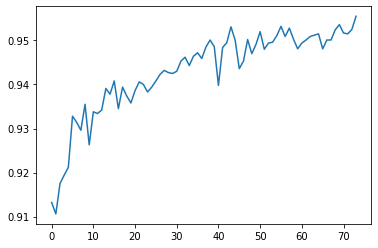

In [43]:
plt.plot(test_accuracy_history)
# plt.plot(test_loss_history)

In [47]:
type(X_test[0])

torch.Tensor

In [ ]:
0 0  0 0  0  
0 4  2 -1 0 
0 -6 0 5  0 
0 3  2 2  0 
0 0  0 0  0 


0 1   2 
1 -1  0
1 0  -2